# Logistic Regression: Multiclass

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [3]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
df = iris.frame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
df['target_name']= df['target'].map({0: 'setosa', 1:'versicolor', 2:'virginica'})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [17]:
df.shape

(150, 6)

In [18]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [19]:
df.target.unique()

array([0, 1, 2])

In [20]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Data Visualization

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

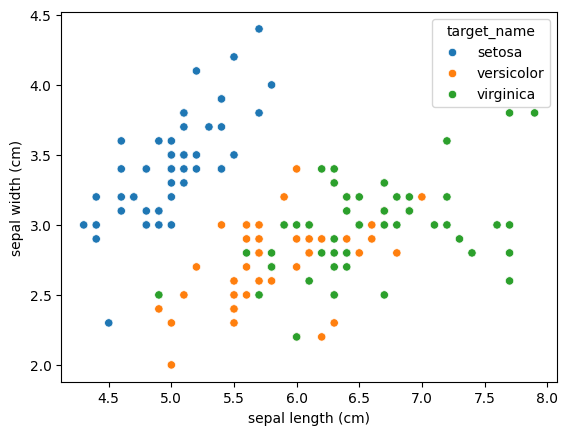

In [23]:
sns.scatterplot(df, x="sepal length (cm)", y="sepal width (cm)", hue="target_name")

<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

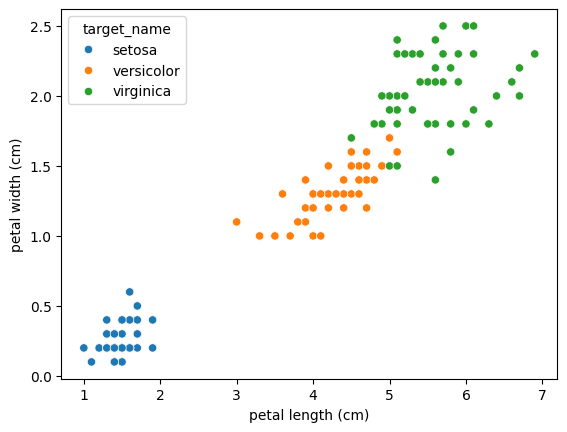

In [24]:
sns.scatterplot(df, x="petal length (cm)", y="petal width (cm)", hue="target_name")

In [26]:
X = df[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]]
y = df['target']
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Data Split

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

# Model Training

In [28]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Model Evaluation: Accuracy

In [29]:
model.score(X_test, y_test)

0.9777777777777777

In [30]:
y_pred = model.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
score

0.9777777777777777

## Precision , Recall, F1 Score, Confusion matrix

In [34]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.94      0.97        16
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [35]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[15  0  0]
 [ 0 15  1]
 [ 0  0 14]]


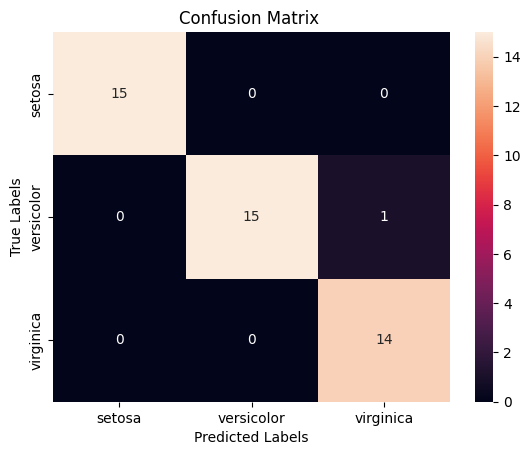

In [38]:
sns.heatmap(cm, xticklabels=iris.target_names, yticklabels=iris.target_names, annot=True)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix ")
plt.show()